# Week 2: Classification Part 1 - Logistic Regression (Solution)

Classification is similar to regression except that the output variable is a discrete category as opposed to a continuous value. The goal of classiﬁcation is to accurately predict the target class for each case in the data.

The most common form of classiﬁcation is binary classiﬁcation where examples are assigned one of two labels. However, there is also multi-class classiﬁcation where examples are assigned one of more than two labels. A common example of multi-class classiﬁcation is handwritten digit recognition where the aim is to assign each input vector to one of a ﬁnite number of discrete categories.

This notebook will be focused on **logistic regression** which is a binary classiﬁcation algorithm. It is a simple and powerful linear classiﬁcation algorithm. It also serves as a good example of applying a supervised learning algorithm to a dataset. 

In [1]:
# Helper functions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from seaborn import heatmap

def plot_loss_curve(logs):
    fig = plt.figure(figsize=(10, 10))
    plt.plot(logs)
    plt.show()

def return_binary(y_train, y_test, classNum):
    trainIndices = y_train == classNum
    testIndices = y_test == classNum
    y_train_binary = np.zeros(y_train.shape)
    y_test_binary = np.zeros(y_test.shape)
    y_train_binary[trainIndices] = 1
    y_test_binary[testIndices] = 1
    return y_train_binary, y_test_binary
 

### Loading the Data

Below is the code for loading sklearn's breast cancer dataset and splitting it into train and test sets. For simplicity, we will only look at two classes for binary classification.

In [2]:
# Load data
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
CLASSNUM = 0
y_train_binary, y_test_binary = return_binary(y_train, y_test, CLASSNUM)

### Logistic Regression implementation using Scikit-Learn

Below, write the code that uses Scikit-Learn's logsitic regression model, trains it and uses it to get our y binary predictions for classification.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.956140350877193
Precision:  0.975


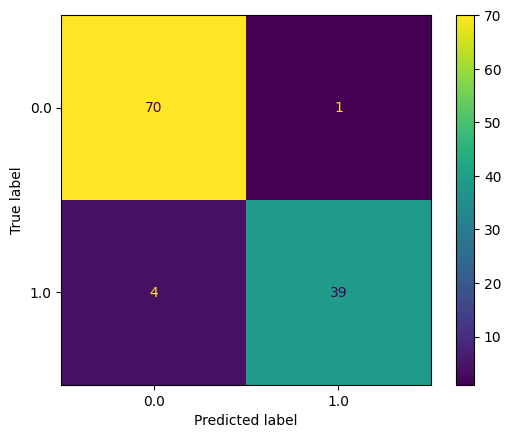

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

### SOLUTION
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train_binary)
y_pred = logistic_regression.predict(X_test)
### SOLUTION

print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print("Precision: ", precision_score(y_test_binary, y_pred))
_ = ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred)


### 1. Closed-form solution
Last week, in terms of linear regression, we looked at the closed-form solution and how this technique can allow you to find fitting parameters in one step. We can use it for binary classification too. Below is a function template to implement this, please add code to compute the weights with the normal equation, use these weights to find the predicted y outputs, and convert the output to a binary 0/1 value. 

In [6]:
def linear_classifier(X_train, y_train, X_test):

    # add bias to training data
    biased_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    # add bias
    biased_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    X = biased_train
    y = y_train

    ### SOLUTION

    # use the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    # predict
    y_pred = biased_test @ w

    # convert to binary
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0

    ### SOLUTION

    return y_pred

Now let's see how accurate your predictions are!

Accuracy:  0.956140350877193
Precision:  0.975


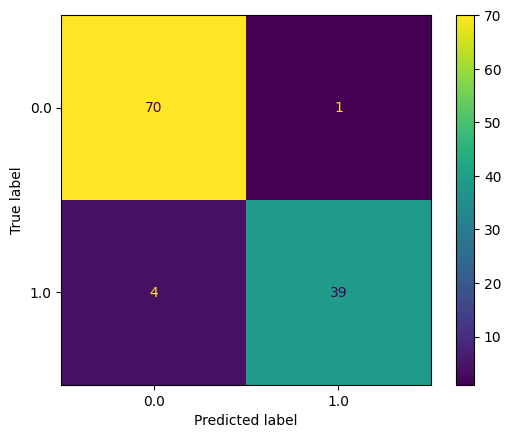

In [7]:
# Train and test
y_pred = linear_classifier(X_train, y_train_binary, X_test)

print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print("Precision: ", precision_score(y_test_binary, y_pred))
_ = ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred)


#### Aside - The Sigmoid Function

The sigmoid function is an activation function that you will see extremely often in neural networks. It is defined as follows:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

What it essentially does is smoothly squish any value to a value between 0 and 1. This is useful especially for binary classification where we want to classify an example as either 0 or 1.

You will see this function a lot in subsequent notebooks. Please implement the sigmoid function below:

In [14]:
def sigmoid(z):
    ### SOLUTION
    sig = 1 / (1 + np.exp(-z))
    ### SOLUTION
    return sig

### 2. Gradient Descent

You saw gradient descent last week in terms of linear regression. We can use it for logistic regression too, however this time we will use a different loss function.

In this notebook, we will use the logistic loss function. It is defined as follows:


$$\mathcal{L}(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(\hat{y}) + (1 - y^{(i)})\log(1 - \hat{y})$$

where $\hat{y} = h_{\theta}(x^{(i)}) = \sigma(\theta^{T}x^{(i)})$.

Don't worry if this looks too complicated! In a nutshell, like other loss functions, it is a measure of how well our model is doing. The lower the loss, the better our model is doing. A simplified version of the loss function is as follows:

Since $y^{(i)}$ can only be 0 or 1, each individual loss calculation can be simplified to

$$\mathcal{L}(\hat{y}, y) = \begin{cases} -\log(\hat{y}) & \text{if } y = 1 \\ -\log(1 - \hat{y}) & \text{if } y = 0 \end{cases}$$

The total loss is then the average of all the individual losses.

Finding the gradient of this loss function is a little more complicated than linear regression, but it is still doable. The gradient is as follows:

$$\nabla_{\theta}\mathcal{L}(\theta) = \frac{1}{m}x^{T}(\hat{y} - y)$$



In [9]:
# we add the tiny numbers in the logs because log(0) is undefined
def loss(preds, targets):
    preds = preds.flatten()
    loss_calc = -np.mean(targets * np.log(preds + 1e-200) + (1 - targets) * np.log(1 - preds + 1e-200))
    return loss_calc

def dloss(preds, targets, X):
    targets = targets.reshape(-1, 1)
    return X.T @ (preds - targets) / X.shape[0]

Now, fill in our hypothesis function.

In [10]:
def hypothesis(X, W):
    ### SOLUTION
    hyp = sigmoid(X @ W)
    ### SOLUTION
    return hyp

We now have completed enough components to implement gradient descent.

In [11]:
def gradient_descent(X, Y, W, learning_rate, num_iterations):

    history = []
    for i in range(num_iterations):
        ### SOLUTION
        preds = hypothesis(X, W)
        cost = loss(preds, Y)
        history.append(cost)
        gradient = dloss(preds, Y, X)
        W -= learning_rate * gradient
        ### SOLUTION
    
    return W, history

Now lets put together our Classification pipeline by firstly setting our X train and test sets, initialize the weights, train our model with gradient descent, then evaluate the model performance by looking at the loss curve and confusion matrix.

C:\Users\suhai\AppData\Local\Temp\ipykernel_35812\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


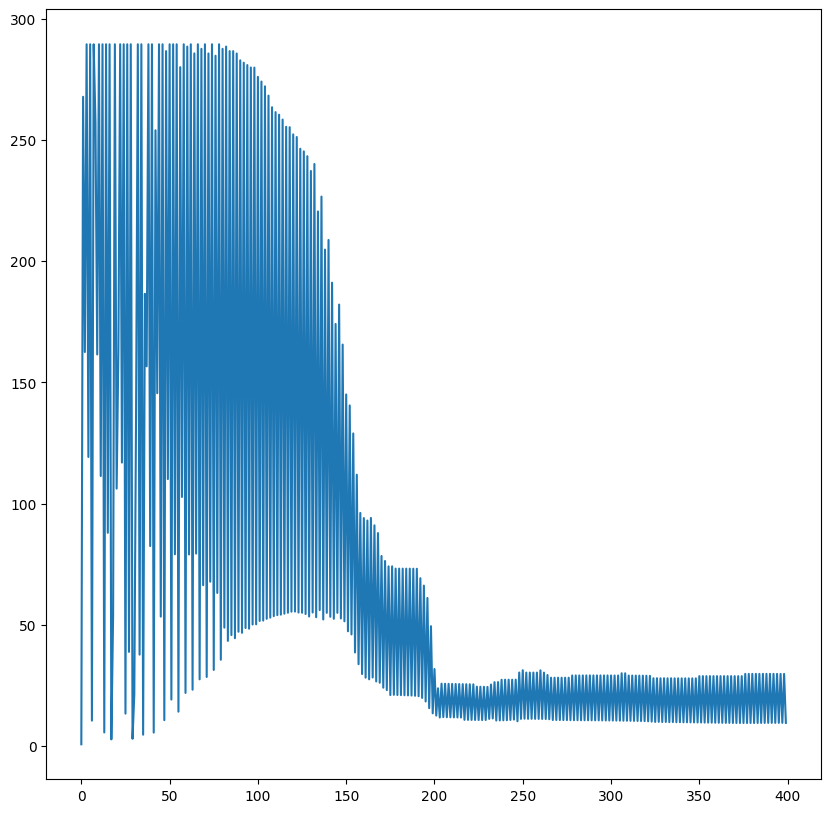

Accuracy:  0.9035087719298246
Precision:  0.7962962962962963


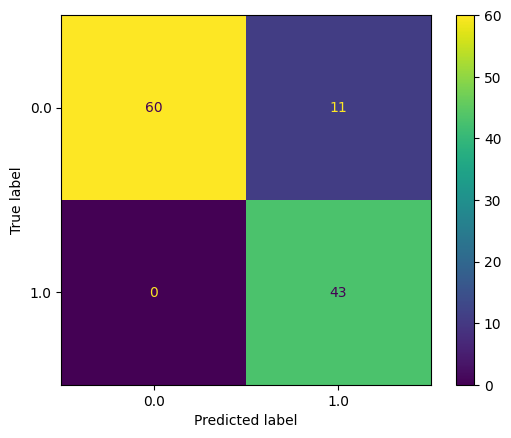

In [18]:
# Make data binary

# Add bias
X_train_biased = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_biased = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Starting weights
W = np.zeros((X_train_biased.shape[1], 1))

# Train
W, history = gradient_descent(X_train_biased, y_train_binary, W, 0.001, 400)

# Plot loss
plot_loss_curve(history)

# Test
y_pred = hypothesis(X_test_biased, W)
y_pred = np.round(y_pred)

print("Accuracy: ", accuracy_score(y_test_binary, y_pred))
print("Precision: ", precision_score(y_test_binary, y_pred))
_ = ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred)